# Fraud detection in credit transactions

https://www.kaggle.com/ntnu-testimon/banksim1

## 1. Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy as sc
import seaborn as sns
%matplotlib inline
from math import sqrt
matplotlib.style.use('ggplot')

## 2. Read data and preliminary analysis

In [2]:
data1 = pd.read_csv('bs140513_032310.csv.zip', compression = 'zip')

In [3]:
print('Data shape: rows ={}, columns = {}'.format(data1.shape[0], data1.shape[1]))
data1.head()

Data shape: rows =594643, columns = 10


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [4]:
#zipcodeOri and zipMerchant doesn't have any predictive power, zero variance(unique value), so dropping them
df=data1.drop(columns=['zipcodeOri', 'zipMerchant'])

In [5]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['customer', 'age', 'gender', 'merchant', 'category']

In [6]:
for col in cat_cols:
        df[col] = df[col].str.replace('\'', '')

## 3. Performing Exploratory Data Analysis

### Analyzing distinct values of variables

In [7]:
#Top 10 Merchant based on number of transaction along with number of fraud
mer = df.groupby('merchant').agg({'fraud':'sum','category':'count' }).reset_index().\
rename(columns = {'category':'num_transactions', 'fraud':'num_frauds'}).sort_values(by='num_transactions',ascending=False).head(10)
# mer_transactions.to_csv('merchant_transactions.csv', index = False)
mer.head(2)

,merchant,num_frauds,num_transactions
18,M1823072687,0,299693
30,M348934600,0,205426


In [8]:
#Top 10 Merchant based on number of transaction along with number of fraud
mer_transactions = df.groupby('merchant').agg({'category':'count' }).reset_index().\
rename(columns = {'category':'num_transactions'}).sort_values(by='num_transactions',ascending=False).head(5)
mer_transactions.to_csv('merchant_transactions.csv', index = False)
mer_transactions

,merchant,num_transactions
18,M1823072687,299693
30,M348934600,205426
45,M85975013,26254
0,M1053599405,6821
9,M151143676,6373


In [9]:
#Top 10 Merchant based on number of transaction along with number of fraud
merchant_frauds = df.groupby('merchant').agg({'fraud':'sum'}).reset_index().\
rename(columns = {'fraud':'num_frauds'}).sort_values(by='num_frauds',ascending=False).head(5)
merchant_frauds.to_csv('merchant_fraud.csv', index = False)
merchant_frauds

,merchant,num_frauds
34,M480139044,1634
49,M980657600,1472
40,M732195782,518
2,M1198415165,358
32,M3697346,290


[Text(0, 0, 'M1823072687'),
 Text(0, 0, 'M348934600'),
 Text(0, 0, 'M85975013'),
 Text(0, 0, 'M1053599405'),
 Text(0, 0, 'M151143676')]

<Figure size 432x288 with 0 Axes>

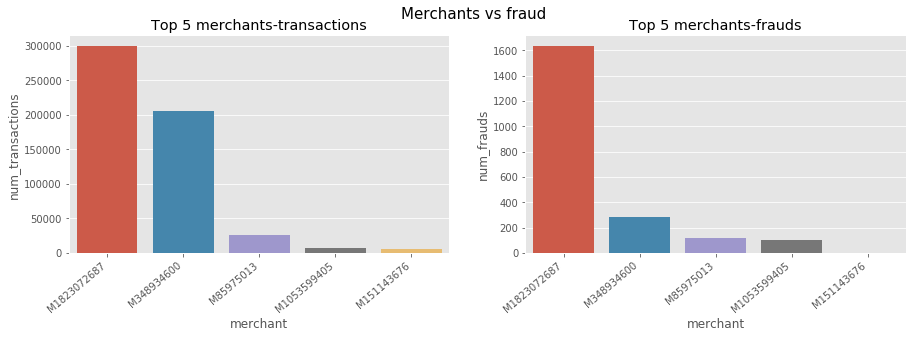

In [10]:
fig = plt.figure()
fig, axes = plt.subplots(1,2, figsize = (15,4))
plt.suptitle('Merchants vs fraud', fontsize = 15)

fig1 = sns.barplot(data = mer.head(), x = 'merchant', y = 'num_transactions', ax = axes[0], label = 'abc')
fig2 = sns.barplot(data = mer.sort_values(by = 'num_frauds', ascending = False).head(), x = 'merchant', y = 'num_frauds', ax = axes[1])
axes[0].set_title('Top 5 merchants-transactions')
axes[1].set_title('Top 5 merchants-frauds')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha='right')
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha='right')
# fig.savefig('merchant_fraud.csv.png')  

<Figure size 432x288 with 0 Axes>

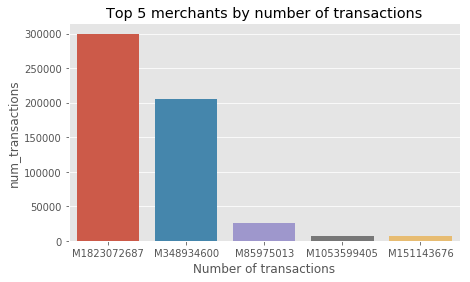

In [14]:
fig = plt.figure()
fig, axes = plt.subplots(1,1, figsize = (7,4))
# plt.suptitle('Merchants vs fraud', fontsize = 15)

fig1 = sns.barplot(data = mer_transactions, x = 'merchant', y = 'num_transactions', ax = axes, label = 'abc')
axes.set_title('Top 5 merchants by number of transactions')
axes.set_xlabel('Number of transactions')
#axes.set_xticklabels(axes.get_xticklabels(), rotation=40, ha='right')
plt.show()
fig.savefig('merchant_transactions.csv.png')  

<Figure size 432x288 with 0 Axes>

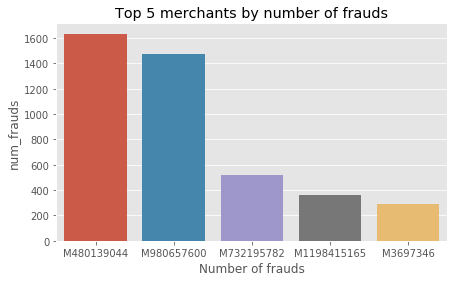

In [15]:
fig = plt.figure()
fig, axes = plt.subplots(1,1, figsize = (7,4))
# plt.suptitle('Merchants vs fraud', fontsize = 15)

fig1 = sns.barplot(data = merchant_frauds.head(), x = 'merchant', y = 'num_frauds', ax = axes, label = 'abc')
axes.set_title('Top 5 merchants by number of frauds')
axes.set_xlabel('Number of frauds')
# axes.set_xticklabels(axes.get_xticklabels(), rotation=40, ha='right')
plt.show()
fig.savefig('merchant_fraud.csv.png')  

In [46]:
df.groupby('category').category.count().sort_values(ascending = False)

category
es_transportation        505119
es_food                   26254
es_health                 16133
es_wellnessandbeauty      15086
es_fashion                 6454
es_barsandrestaurants      6373
es_hyper                   6098
es_sportsandtoys           4002
es_tech                    2370
es_home                    1986
es_hotelservices           1744
es_otherservices            912
es_contents                 885
es_travel                   728
es_leisure                  499
Name: category, dtype: int64

In [54]:
df.groupby('category').size().sort_values(ascending = False)

category
es_transportation        505119
es_food                   26254
es_health                 16133
es_wellnessandbeauty      15086
es_fashion                 6454
es_barsandrestaurants      6373
es_hyper                   6098
es_sportsandtoys           4002
es_tech                    2370
es_home                    1986
es_hotelservices           1744
es_otherservices            912
es_contents                 885
es_travel                   728
es_leisure                  499
dtype: int64

In [16]:
#Top 10 category based on number of transaction along with number of fraud
category_transactions = df.groupby('category').agg({'customer':'count' }).reset_index().\
rename(columns = {'customer':'num_transactions'}).sort_values(by='num_transactions',ascending=False).head(5)
category_transactions.to_csv('category_transactions.csv', index = False)
category_transactions

,category,num_transactions
12,es_transportation,505119
3,es_food,26254
4,es_health,16133
14,es_wellnessandbeauty,15086
2,es_fashion,6454


In [17]:
#Top 10 category based on number of transaction along with number of fraud
category_frauds = df.groupby('category').agg({'fraud':'sum' }).reset_index().\
rename(columns = {'fraud':'num_frauds'}).sort_values(by='num_frauds',ascending=False).head(5)
category_frauds.to_csv('category_frauds.csv', index = False)
category_frauds

,category,num_frauds
10,es_sportsandtoys,1982
4,es_health,1696
14,es_wellnessandbeauty,718
13,es_travel,578
6,es_hotelservices,548


<Figure size 432x288 with 0 Axes>

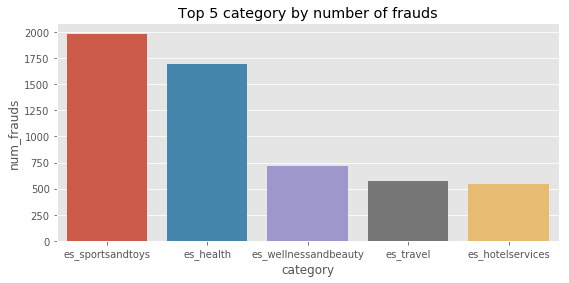

In [22]:
fig = plt.figure()
fig, axes = plt.subplots(1,1, figsize = (9,4))
# plt.suptitle('Categories vs fraud', fontsize = 15)

sns.barplot(data = category_frauds, x = 'category', y = 'num_frauds', ax = axes, label = 'abc')
axes.set_title('Top 5 category by number of frauds')
# axes.set_xticklabels(axes.get_xticklabels(), rotation=40, ha='right')
# axes.set_xticklabels(axes.get_xticklabels(), rotation=40, ha='right')
plt.show()
fig.savefig('category_frauds.csv.png')

KeyError: 'num_frauds'

<Figure size 432x288 with 0 Axes>

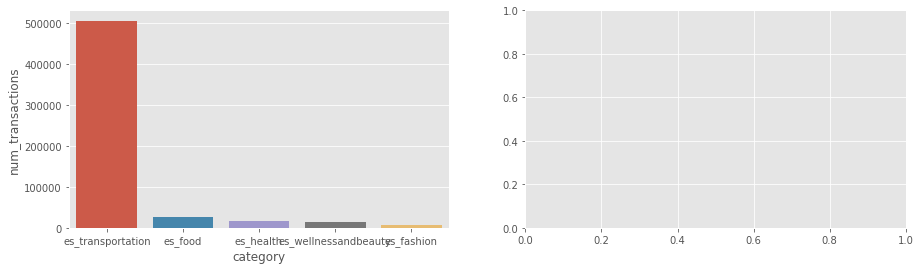

In [66]:
fig = plt.figure()
fig, axes = plt.subplots(1,2, figsize = (15,4))
# plt.suptitle('Categories vs fraud', fontsize = 15)

fig1 = sns.barplot(data = cat.head(), x = 'category', y = 'num_transactions', ax = axes[0], label = 'abc')
fig2 = sns.barplot(data = cat.sort_values(by = 'num_frauds', ascending = False).head(), x = 'category', y = 'num_frauds', ax = axes[1])
axes[0].set_title('Top 5 category-transactions')
axes[1].set_title('Top 5 category-frauds')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha='right')
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha='right')
fig.savefig('cat_fraud.csv.png')

<Figure size 432x288 with 0 Axes>

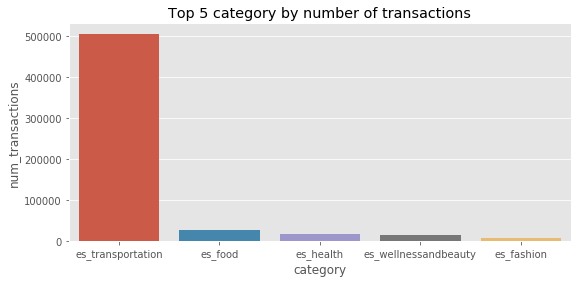

In [23]:
fig = plt.figure()
fig, axes = plt.subplots(1,1, figsize = (9,4))
# plt.suptitle('Categories vs fraud', fontsize = 15)

sns.barplot(data = category_transactions, x = 'category', y = 'num_transactions', ax = axes, label = 'abc')
axes.set_title('Top 5 category by number of transactions')
# axes.set_xticklabels(axes.get_xticklabels(), rotation=40, ha='right')
# axes.set_xticklabels(axes.get_xticklabels(), rotation=40, ha='right')
plt.show()
fig.savefig('category_transactions.csv.png')

## Analyzing the target variable - fraud

In [106]:
print('Overall percentage of fraud\n',df[['amount', 'fraud']].groupby('fraud').count()*100/len(df))

Overall percentage of fraud
           amount
fraud           
0      98.789189
1       1.210811


In [189]:
print('Mean and median amount of transactions wrt frauds')
f = df.groupby('fraud', as_index = False).agg({'amount':['mean', 'median', 'count']})
# f.columns = f.columns.droplevel(0)
f.columns = ['_'.join(col) for col in f.columns]
f.rename(columns = {'amount_count':'num_frauds','fraud_':'fraud' }, inplace = True)
f['percent_frauds'] = 100*f['num_frauds']/len(df)
f.apply(lambda x: round(x,2))
f['fraud'] = np.where(f['fraud'] == 1, 'Yes', 'No')
# f.to_csv('fraud_analysis.csv', index = False)
f[['fraud','amount_mean','amount_median']].to_csv('Amount_frauds.csv', index = False)
f[['fraud','num_frauds','percent_frauds']].to_csv('frauds_analysis.csv', index = False)
f

Mean and median amount of transactions wrt frauds


,fraud,amount_mean,amount_median,num_frauds,percent_frauds
0,No,31.847230,26.610,587443,98.789189
1,Yes,530.926551,319.175,7200,1.210811


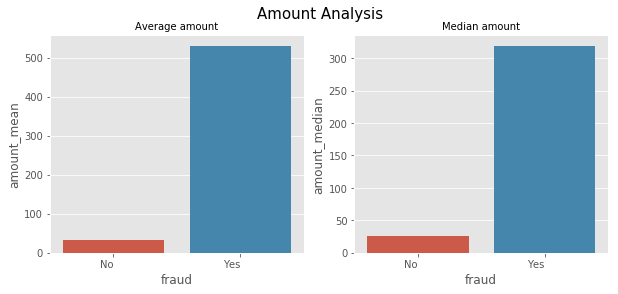

In [200]:
fig,axes = plt.subplots(1,2,figsize = (10,4))

plt.suptitle('Amount Analysis', fontsize = 15)
fig1 = sns.barplot(data = f, x = 'fraud', y = 'amount_mean', ax = axes[0], label = 'abc')
fig2 = sns.barplot(data = f, x = 'fraud', y = 'amount_median', ax = axes[1], label = 'abc')

axes[0].set_title('Average amount', fontsize = 10)
axes[1].set_title('Median amount', fontsize = 10)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, ha='right')
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=0, ha='right')
# axes[0].set_xlabel('')
# axes[1].set_xlabel('')
plt.savefig('Amount_frauds.csv.png')

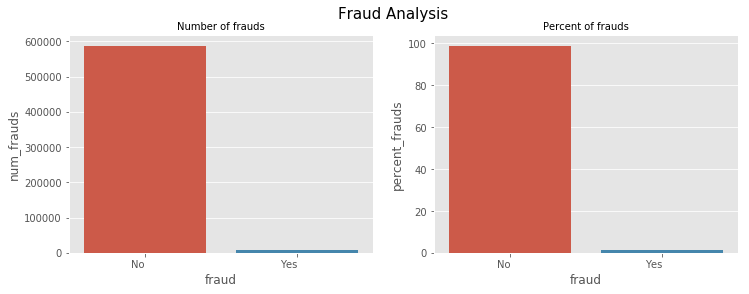

In [203]:
fig,axes = plt.subplots(1,2,figsize = (12,4))
plt.suptitle('Fraud Analysis', fontsize = 15)

fig1 = sns.barplot(data = f, x = 'fraud', y = 'num_frauds', ax = axes[0], label = 'abc')
fig2 = sns.barplot(data = f, x = 'fraud', y = 'percent_frauds', ax = axes[1], label = 'abc')
axes[0].set_title('Number of frauds', fontsize = 10)
axes[1].set_title('Percent of frauds', fontsize = 10)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, ha='right')
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=0, ha='right')
plt.savefig('frauds_analysis.csv.png')

In [79]:
pd.DataFrame(df[['amount', 'fraud']].groupby('fraud').count()*100/len(df))

,amount
fraud,
0,98.789189
1,1.210811


In [84]:
df.fraud.value_counts()*100/len(df)

,fraud
0,98.789189
1,1.210811


#### We can clearly see in case of fraud transactions the mean and median amount is quite high comparatively

<Figure size 432x288 with 0 Axes>

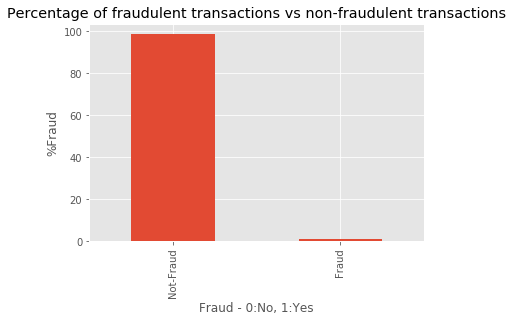

In [78]:
plt.figure()
#figure.figsize()
pd.DataFrame(df[['amount', 'fraud']].groupby('fraud').count()*100/len(df)).plot(kind = 'bar', legend = False)
plt.title('Percentage of fraudulent transactions vs non-fraudulent transactions')
plt.xlabel('Fraud - 0:No, 1:Yes')
plt.ylabel('%Fraud')
plt.xticks([0,1], labels = ['Not-Fraud','Fraud'])
plt.x
plt.show()
# plt.savefig('percent of fraud transactions.png')

In [73]:
#Creating log amount +1 and plotting histogram
df['log_amount'] = np.log(df['amount']+1)

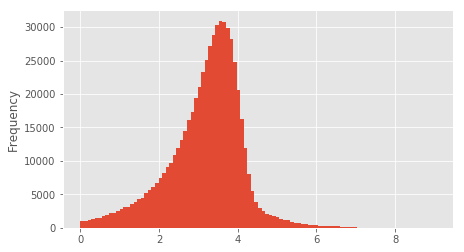

In [158]:
fig = df.log_amount.plot(kind = 'hist', bins = 100, figsize = (7,4))
#df.log_amount.plot(kind = 'kde',figsize = (7,4))
df[['log_amount']].to_csv('amount_log_histogram.csv',index = False )
fig = fig.get_figure()
fig.savefig('amount_log_histogram.csv.png')

In [163]:
df[df['fraud']==1].loc[:,['log_amount']].to_csv('amount_log_distplot1.csv',index = False )
df[df['fraud']==0].loc[:,['log_amount']].to_csv('amount_log_distplot2.csv',index = False )

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


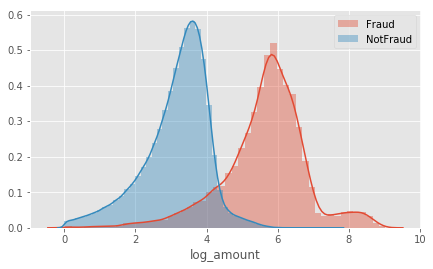

In [164]:
plt.figure(figsize = (7,4))
sns.distplot(df[df['fraud']==1].log_amount)
sns.distplot(df[df['fraud']==0].log_amount)
plt.legend(labels = ['Fraud', 'NotFraud'])
plt.yticks()
plt.savefig('amount_log_displot.png')

In [165]:
transactionVsFraud = pd.DataFrame(data = {'Transactions': X1, 'Frauds': X2.ravel()})
# transactionVsFraud.to_csv('transactionVsFraud.csv')
transactionVsFraud

NameError: name 'X1' is not defined

### Deeper analysis on effect of merchant on frauds

In [24]:
#Checking for merchants with the highest number of frauds per number of transactions at them \
# Also checking the median amount of fraud amount at these merchants
df2 = df.groupby('merchant', as_index = False).agg({'customer':'count','fraud': 'sum', 'amount':'median','category': 'unique'})\
.rename(columns = {'customer': 'Count_transactions', 'fraud': 'Num_frauds', 'amount': 'Median_amount'})
df2['ratio_fraud_transactions']=np.where(df2.Num_frauds ==0,0, df2.Num_frauds/df2.Count_transactions * 100)
df2.sort_values(by ='ratio_fraud_transactions', ascending = False, inplace = True )
#df2 = df2[df2['Num_frauds'] != 0].reset_index(drop = True)
df2.head(20)

,merchant,Count_transactions,Num_frauds,Median_amount,category,ratio_fraud_transactions
3,M1294758098,191,184,289.440,[es_leisure],96.335079
32,M3697346,308,290,300.355,[es_leisure],94.155844
21,M1873032707,250,216,291.740,[es_hotelservices],86.400000
40,M732195782,608,518,1964.460,[es_travel],85.197368
49,M980657600,1769,1472,249.050,[es_sportsandtoys],83.210854
6,M1353266412,78,64,308.425,[es_hotelservices],82.051282
44,M857378720,122,92,301.455,[es_hotelservices],75.409836
26,M2080407379,48,36,2074.950,[es_travel],75.000000
25,M2011752106,244,166,222.255,[es_hotelservices],68.032787
14,M17379832,282,178,173.300,[es_sportsandtoys],63.120567


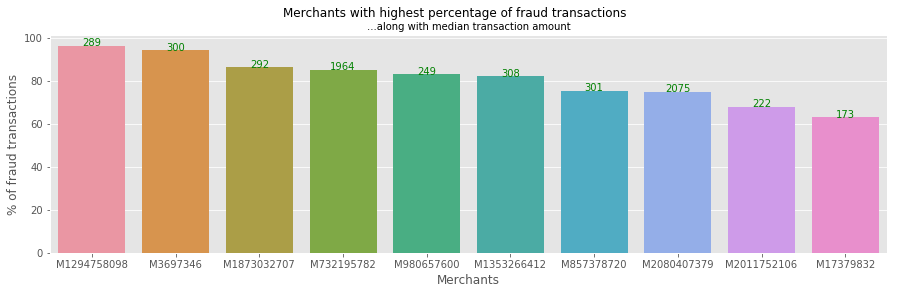

In [26]:
df2_plot = df2[df2['Num_frauds'] != 0].reset_index(drop = True).head(10)
plt.figure(figsize = (15,4))
# plt.xticks(rotation = 45, fontsize = 10, ha = 'right')
g =sns.barplot(data = df2_plot, x = 'merchant', y = 'ratio_fraud_transactions')
for index, row in df2_plot.iterrows():
    g.text(row.name,row.ratio_fraud_transactions,round(row.Median_amount), color='g', ha="center")
# plt.xticks(rotation = 90)
plt.ylabel('% of fraud transactions')
plt.suptitle('Merchants with highest percentage of fraud transactions')
plt.title('...along with median transaction amount', fontsize = 10)
plt.xlabel('Merchants')
plt.savefig('merchant_analysis.csv.png')
df2_plot[['merchant','Median_amount','ratio_fraud_transactions']].to_csv('merchant_analysis.csv', index = False)

### Deepar analysis for effect of category on frauds

In [27]:
#Checking for category with the highest number of frauds per number of transactions at them \
# Also checking the median amount of fraud amount at these category
df_category = df.groupby('category', as_index = False).agg({'customer':'count','fraud': 'sum', 'amount':'median', 'merchant': 'unique'})\
.rename(columns = {'customer': 'Count_transactions', 'fraud': 'Num_frauds', 'amount': 'Median_amount', 'merchant': 'total_merchants'})
df_category['ratio_fraud_transactions']=np.where(df_category.Num_frauds ==0,0, df_category.Num_frauds/df_category.Count_transactions * 100)
df_category.sort_values(by ='ratio_fraud_transactions', ascending = False, inplace = True )
#df_category = df_category[df_category['Num_frauds'] != 0].reset_index(drop = True)
df_category.head(10)

,category,Count_transactions,Num_frauds,Median_amount,total_merchants,ratio_fraud_transactions
8,es_leisure,499,474,296.660,"[M3697346, M1294758098]",94.989980
13,es_travel,728,578,1888.460,"[M732195782, M495352832, M2080407379, M1726401...",79.395604
10,es_sportsandtoys,4002,1982,134.175,"[M1741626453, M980657600, M17379832, M16491693...",49.525237
6,es_hotelservices,1744,548,131.940,"[M348875670, M1873032707, M2011752106, M857378...",31.422018
9,es_otherservices,912,228,87.280,[M1888755466],25.000000
5,es_home,1986,302,111.310,"[M2122776122, M117188757, M923029380, M1872033...",15.206445
4,es_health,16133,1696,97.890,"[M50039827, M1053599405, M480139044, M69289850...",10.512614
11,es_tech,2370,158,90.390,"[M840466850, M1842530320, M1416436880]",6.666667
14,es_wellnessandbeauty,15086,718,51.895,"[M1535107174, M209847108, M1198415165, M174843...",4.759380
7,es_hyper,6098,280,36.750,[M855959430],4.591669


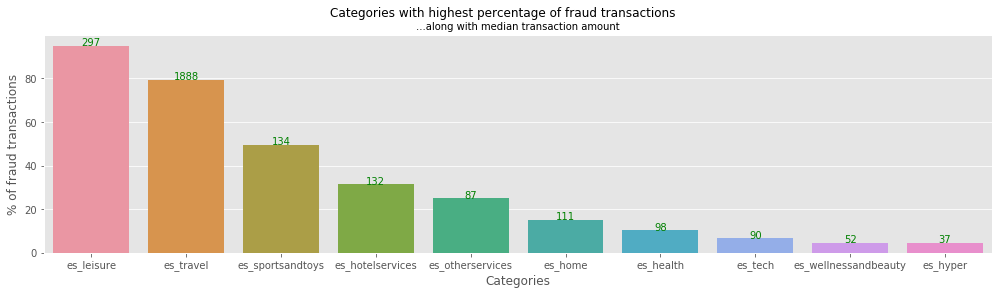

In [29]:
df_category_plot = df_category[df_category['Num_frauds'] != 0].reset_index(drop = True).head(10)
plt.figure(figsize = (17,4))
g =sns.barplot(data = df_category_plot, x = 'category', y = 'ratio_fraud_transactions')
# plt.xticks(rotation = 45, fontsize = 12, ha = 'right')
for index, row in df_category_plot.iterrows():
    g.text(row.name,row.ratio_fraud_transactions,round(row.Median_amount), color='g', ha="center")
plt.ylabel('% of fraud transactions')
plt.suptitle('Categories with highest percentage of fraud transactions')
plt.title('...along with median transaction amount', fontsize = 10)
plt.xlabel('Categories', fontsize = 12)

df_category_plot[['category','ratio_fraud_transactions','Median_amount']].to_csv('category_analysis.csv', index = False)
plt.savefig('category_analysis.csv.png')

## Analysis by customer

In [6]:
df_customer = df.groupby('customer', as_index = False).agg({'fraud': ['count','sum'],\
                                                            'amount':['mean','median','min','max'],
                                                            'category': ['nunique','count','unique'],
                                                            'merchant': ['nunique','count','unique']})\
#.rename(columns = {'customer': 'Count_transactions', 'fraud': 'Num_frauds', 'amount': 'Median_amount', 'merchant': 'total_merchants'})
df_customer.columns = ['_'.join(col) for col in df_customer.columns]
df_customer.rename(columns = {'customer_':'customer','fraud_count': 'cust_num_transactions', 'fraud_sum': 'cust_num_frauds'}, inplace = True)
df_customer['cust_ratio_fraud_transactions']=np.where(df_customer.cust_num_frauds ==0,0, df_customer.cust_num_frauds/df_customer.cust_num_transactions * 100)
df_customer.sort_values(by ='cust_ratio_fraud_transactions', ascending = False, inplace = True)
#df_customer = df_customer[df_customer['num_frauds'] != 0].reset_index(drop = True)
df_customer = df_customer.reset_index(drop = True)
df_customer.head(4)
#df_customer.shape
#add age -

,customer,cust_num_transactions,cust_num_frauds,amount_mean,amount_median,amount_min,amount_max,category_nunique,category_count,category_unique,merchant_nunique,merchant_count,merchant_unique,cust_ratio_fraud_transactions
0,'C910454738',92,87,410.820761,335.995,5.45,4187.09,12,92,"['es_travel', 'es_sportsandtoys', 'es_fashion'...",22,92,"['M732195782', 'M980657600', 'M547558035', 'M8...",94.565217
1,'C2004941826',126,119,513.897460,296.030,4.71,4091.43,12,126,"['es_sportsandtoys', 'es_barsandrestaurants', ...",24,126,"['M980657600', 'M151143676', 'M480139044', 'M8...",94.444444
2,'C381007057',100,89,513.888700,254.180,18.05,6129.63,10,100,"['es_sportsandtoys', 'es_health', 'es_leisure'...",22,100,"['M980657600', 'M692898500', 'M50039827', 'M93...",89.000000
3,'C1572610482',101,89,581.060693,311.040,6.19,4953.41,11,101,"['es_health', 'es_wellnessandbeauty', 'es_spor...",23,101,"['M480139044', 'M209847108', 'M980657600', 'M8...",88.118812


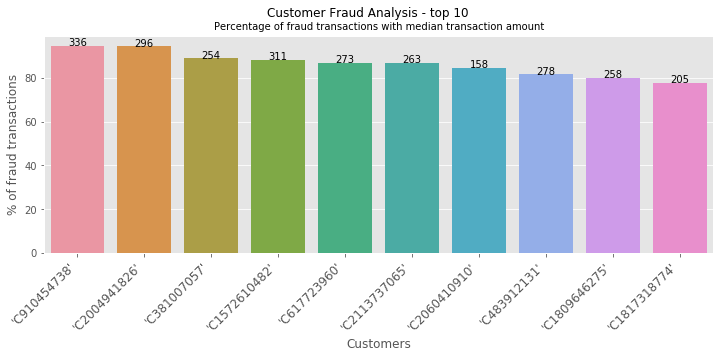

In [182]:
plt.figure(figsize = (12,4))
g =sns.barplot(data = df_customer.head(10), x = 'customer', y = 'cust_ratio_fraud_transactions')
plt.xticks(rotation = 45, fontsize = 12, ha = 'right')
for index, row in df_customer.head(10).iterrows():
    g.text(row.name,row.cust_ratio_fraud_transactions,round(row.amount_median), color='black', ha="center")
plt.ylabel('% of fraud transactions')
plt.suptitle('Customer Fraud Analysis - top 10')
plt.title('Percentage of fraud transactions with median transaction amount', fontsize = 10)
plt.xlabel('Customers', fontsize = 12)

df_customer.head(10).to_csv('customer2.csv', index = False)
plt.savefig('customer2.csv.png')

In [13]:
columnstokeep = ['customer','cust_num_transactions','cust_num_frauds','cust_ratio_fraud_transactions','amount_mean','amount_median','step','merchant','category','log_amount','amount', 'fraud']
df_cust2 = pd.merge(df, df_customer, on = 'customer')[columnstokeep]\
    .sort_values(by = 'cust_num_frauds', ascending = False).reset_index(drop = True)\
    .rename(columns = {'amount_mean':'cust_amount_mean', 'amount_median':'cust_amount_median'})
df_cust2.head()

,customer,cust_num_transactions,cust_num_frauds,cust_ratio_fraud_transactions,cust_amount_mean,cust_amount_median,step,merchant,category,log_amount,amount,fraud
0,'C1350963410',191,144,75.39267,294.331728,179.99,134,'M1294758098','es_leisure',5.861754,350.34,1
1,'C1350963410',191,144,75.39267,294.331728,179.99,73,'M732195782','es_travel',7.719263,2250.30,1
2,'C1350963410',191,144,75.39267,294.331728,179.99,80,'M1294758098','es_leisure',5.069344,158.07,1
3,'C1350963410',191,144,75.39267,294.331728,179.99,80,'M1741626453','es_sportsandtoys',2.891482,17.02,1
4,'C1350963410',191,144,75.39267,294.331728,179.99,79,'M857378720','es_hotelservices',5.947669,381.86,1
